In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ads-ctr-optimisation/Ads_CTR_Optimisation.csv


# Credits and Links

* UDEMY - Machine Learning A-Z <sup>TM</sup>*

<a id="index"></a>
# Table of Content

1. [Importing Libraries](#1)
2. [Importing Dataset](#2)
3. [Thompson Sampling Model Implementation](#3)
5. [Results](#5)

<a id="1"></a>
# 1. Importing Libraries

[Go back to Index](#index)

In [2]:
#1. General
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import math
import random

<a id="2"></a>
# 2. Importing Dataset

[Go back to Index](#index)

In [3]:
df = pd.read_csv("/kaggle/input/ads-ctr-optimisation/Ads_CTR_Optimisation.csv")

In [4]:
df.head(2)

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0


In [5]:
len(df)

10000

<a id="3"></a>
# 3. Implementing Thompson Sampling model on the dataset

[Go back to Index](#index)

<a href="https://towardsdatascience.com/thompson-sampling-fc28817eacb8">Thompson Sampling Model + Multi Bandit Problem</a>

<b> Please note that this image is credited to the creators of the UDEMY course - Machine Learning A-Z<sup>TM</sup>

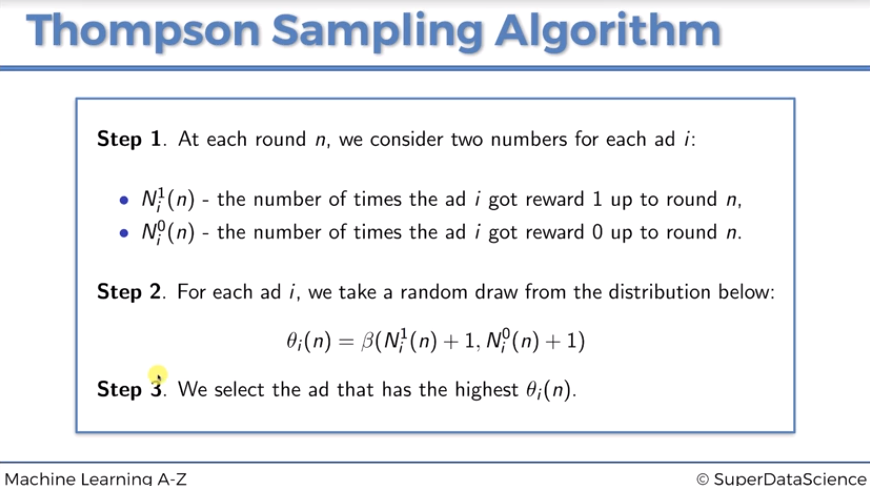

In [6]:
N = 10000 # Total number of Rounds/Users
d = 10 # Total number of ads
ads_selected = []

numbers_of_rewards_1 = [0] * d # number of times each ad gets a reward 1
numbers_of_rewards_0 = [0] * d # number of times each ad gets a reward 0
total_reward = 0 # start with 0 as initially no ads are selected ~ no rewards at first

In [7]:
for n in range(0, N):
    ad = 0
    max_random = 0
    for i in range(0, d):
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = df.values[n, ad]
    if reward == 1:
        numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
    else:
        numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
    total_reward = total_reward + reward

<a id="4"></a>
# 4. Results

[Go back to Index](#index)

## 4.1 Histogram 

Text(0, 0.5, '# selections for each ad')

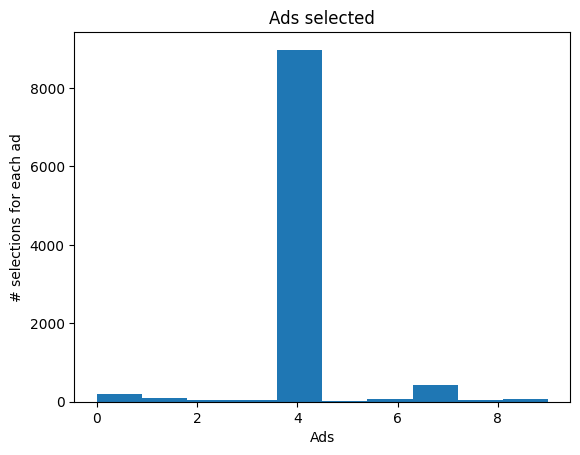

In [8]:
plt.hist(ads_selected)

plt.title("Ads selected")
plt.xlabel("Ads")
plt.ylabel('# selections for each ad')